In [ ]:
import pandas as pd

In [17]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\student_scores.csv')
print(df)

        id first_name last_name                                    email  \
0        1       Paul     Casey           paul.casey.1@gslingacademy.com   
1        2   Danielle  Sandoval    danielle.sandoval.2@gslingacademy.com   
2        3       Tina   Andrews         tina.andrews.3@gslingacademy.com   
3        4       Tara     Clark           tara.clark.4@gslingacademy.com   
4        5    Anthony    Campos       anthony.campos.5@gslingacademy.com   
...    ...        ...       ...                                      ...   
1995  1996       Alan  Reynolds     alan.reynolds.1996@gslingacademy.com   
1996  1997     Thomas   Gilbert    thomas.gilbert.1997@gslingacademy.com   
1997  1998    Madison     Cross     madison.cross.1998@gslingacademy.com   
1998  1999   Brittany   Compton  brittany.compton.1999@gslingacademy.com   
1999  2000    Natalie     Smith     natalie.smith.2000@gslingacademy.com   

      gender  part_time_job  absence_days  extracurricular_activities  \
0       male  

In [19]:
df.head()
df.describe()

,id,absence_days,weekly_self_study_hours,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,3.665500,17.755500,83.452000,80.332000,81.336500,79.995000,79.58150,81.277500,80.888000
std,577.494589,2.629271,12.129604,13.224906,12.736046,12.539453,12.777895,13.72219,12.027087,11.637705
min,1.000000,0.000000,0.000000,40.000000,50.000000,50.000000,50.000000,30.00000,50.000000,60.000000
25%,500.750000,2.000000,5.000000,77.000000,69.750000,71.000000,69.000000,69.00000,72.000000,71.000000
50%,1000.500000,3.000000,18.000000,87.000000,82.000000,83.000000,81.000000,81.00000,83.000000,81.000000
75%,1500.250000,5.000000,28.000000,93.000000,91.000000,92.000000,91.000000,91.00000,91.000000,91.000000
max,2000.000000,10.000000,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,99.000000,100.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

In [23]:
subjects =['math_score','history_score','physics_score','chemistry_score',
            'biology_score','english_score','geography_score']
df['Exam Score']=df[subjects].mean(axis=1)

In [25]:
features =['gender','part_time_job','absence_days',
            'extracurricular_activities','weekly_self_study_hours',
            'career_aspiration']

In [27]:
df_encoded = pd.get_dummies(df[features], drop_first=True)

In [35]:
X= df_encoded
y= df['Exam Score']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)

(1600, 21)
(1600,)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
print(X_train.shape)
print(y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))


(1600, 21)
(1600,)
R²: 0.38961272709206407
RMSE: 5.120049571449165


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [73]:
from sklearn.linear_model import Ridge
Ridge(alpha=1.0).fit(X_train, y_train)


Ridge()

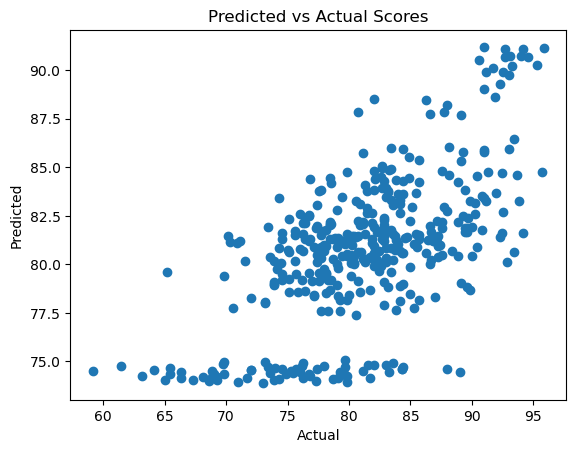

In [76]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual Scores")
plt.show()
